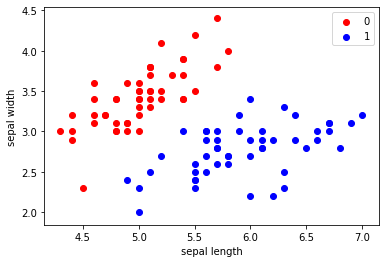

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['label']=iris.target
df.columns=['sepal length','sepal width','petal length','petal width','label']

plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],c='red',label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],c='blue',label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [4]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
#iris是三分类数据集，选前一百行作为此次数据集
data=np.array(df.iloc[:100,[0,1,-1]])
X,y=data[:,:-1],data[:,-1]
y=np.array([1 if i==1 else -1 for i in y])

In [6]:
#符号函数
def sign(x,w,b):
    if np.dot(x,w)+b<0:
        return -1
    else:
        return 1

In [24]:
class Perceptron:
    def __init__(self):
        pass
    
    def sign(self,x,w,b):
        if np.dot(x,w)+b<0:
            return -1
        else:
            return 1
        
    def initializer(self,dim):
        w=np.zeros(dim)
        b=0.0
        return w,b
        
    def train(self,X_train,y_train,eta):
        w,b=self.initializer(X_train.shape[1])
        is_wrong=False
        while not is_wrong:
            wrong_count=0
            for i in range(len(X_train)):
                X=X_train[i]
                y=y_train[i]
                y_hat=self.sign(X,w,b)
                if y*y_hat<=0:
                    w+=eta*np.dot(y,X)
                    b+=eta*y
                    wrong_count+=1
            if wrong_count==0:
                is_wrong=True
            #没有错误时学习终止
            params={'w':w,'b':b}
            
        return params

In [25]:
p=Perceptron()
params=p.train(X,y,0.1)
params

{'w': array([  7.9 , -10.07]), 'b': -12.399999999999972}

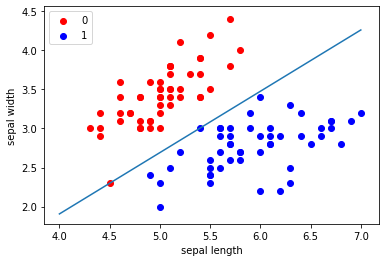

In [26]:
x_points=np.linspace(4,7,30)
y_hat=-(params['w'][0]*x_points+params['b'])/params['w'][1]
plt.plot(x_points,y_hat)

plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],c='red',label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],c='blue',label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()